<a href="https://colab.research.google.com/github/sreejagundu/Convolution-Neural-Network-on-an-Image/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [ ]:
from itertools import product

In [ ]:
#set parameters
plt.rc('figure',autolayout=True)
plt.rc('image',cmap='magma')


In [ ]:
#def kernel
kernel=tf.constant([[-1,-1,-1],[-1,8,-1],[-1,-1,-1],[-1,-1,-1],])

In [ ]:
#load image
image=tf.io.read_file('/content/sample_data/1.jpeg')
image=tf.io.decode_jpeg(image,channels=1)
image=tf.image.resize(image,size=[300,300])

In [ ]:
#plot img
img=tf.squeeze(image).numpy()

In [ ]:
plt.figure(figsize=(5,5))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

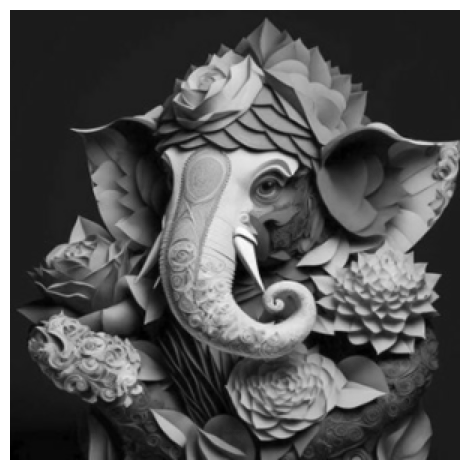

In [ ]:
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
#reformating img
image=tf.image.convert_image_dtype(image,dtype=tf.float32)
image=tf.expand_dims(image,axis=0)
kernel=tf.reshape(kernel,[*kernel.shape,1,1])
kernel=tf.cast(kernel,dtype=tf.float32)

In [ ]:
#convolution layer
conv_fn=tf.nn.conv2d
image_filter=conv_fn(
                     input=image,
                     filters=kernel,
                     strides=1,   # or(1,1)
                     padding='SAME',
                     )

Text(0.5, 1.0, 'convolution')

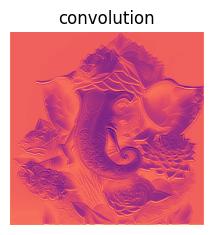

In [ ]:
plt.subplot(1,3,1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('convolution')

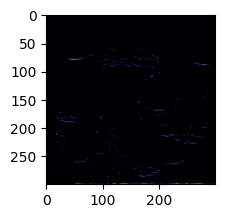

In [ ]:

#activation layer
relu_fn=tf.nn.relu
#img detection
image_detect=relu_fn(image_filter)
plt.subplot(1,3,2)
plt.imshow(
    #reformat for plotting
    tf.squeeze(image_detect)
)

In [ ]:
#pooling layer
pool=tf.nn.pool
image_condense=pool(input=image_detect,
                    window_shape=(2,2),
                    pooling_type='MAX',
                    strides=(2,2),
                    padding='SAME',
                    )

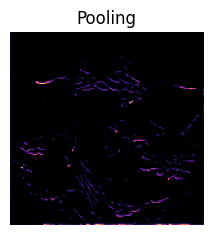

In [ ]:
plt.subplot(1,3,3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()